<a href="https://colab.research.google.com/github/avnish2000/ML-Analysis/blob/main/smarthealthcare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import resample

In [ ]:
# Load data
data = pd.read_csv('/content/framingham.csv')

In [ ]:
# Checking the data frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [ ]:
# Finding the number of missing values
data.isnull().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [ ]:
# Data Preprocessing - Handling missing values and selecting relevant columns
data.fillna(0, inplace=True)  # Replace all NaN values with 0

In [ ]:
# Checking the data frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4240 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4240 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [ ]:
print(data['TenYearCHD'].value_counts())

TenYearCHD
0    3596
1     644
Name: count, dtype: int64


In [ ]:
# Upsampling the minority class
data_majority = data[data['TenYearCHD'] == 0]
data_minority = data[data['TenYearCHD'] == 1]

data_minority_upsampled = resample(data_minority,
                                   replace=True,
                                   n_samples=len(data_majority),
                                   random_state=42)

data_upsampled = pd.concat([data_majority, data_minority_upsampled])

In [ ]:
# Define features and target
X = data_upsampled.drop(columns=['TenYearCHD'])  # Features
y = data_upsampled['TenYearCHD']  # Target

feature_names = X.columns  # Store feature names

In [ ]:
# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
log_acc = accuracy_score(y_test, y_pred_log)

# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred_knn)

In [ ]:
# Display Results
print("Logistic Regression Accuracy:", log_acc)
print("Random Forest Accuracy:", rf_acc)
print("KNN Accuracy:", knn_acc)

print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

Logistic Regression Accuracy: 0.6603336422613532
Random Forest Accuracy: 0.9670991658943466
KNN Accuracy: 0.7873030583873958

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.99      0.94      0.97      1100
           1       0.94      0.99      0.97      1058

    accuracy                           0.97      2158
   macro avg       0.97      0.97      0.97      2158
weighted avg       0.97      0.97      0.97      2158



In [ ]:
# Sample Inputs for Testing - matching the feature order
sample_inputs = pd.DataFrame([
    [1, 43, 1, 0, 0, 0, 0, 0, 0, 126, 152, 96.5, 25.65, 86,0],  # Healthier individual (No Failure)
    [0, 49, 1, 1, 0, 0,0, 1, 0, 214, 172, 111, 40.51, 80, 70]  # High risk individual (Failure)
], columns=feature_names)

# Standardize the sample inputs
sample_inputs_scaled = scaler.transform(sample_inputs)

# Predict on sample inputs
sample_predictions_knn = knn.predict(sample_inputs_scaled)
sample_predictions_log_reg = log_reg.predict(sample_inputs_scaled)
sample_predictions_rf = rf.predict(sample_inputs_scaled)
print(sample_predictions_knn)

[0 1]


In [ ]:
# Map predictions to readable labels
def map_predictions(predictions):
    return ["No Risk" if pred == 0 else "Risk" for pred in predictions]

print("\nSample Predictions:")
for i, input_vals in enumerate(sample_inputs.values, 1):
    print(f"Input {i} -> KNN: {map_predictions([sample_predictions_knn[i-1]])[0]}, "
          f"Logistic Regression: {map_predictions([sample_predictions_log_reg[i-1]])[0]}, "
          f"Random Forest: {map_predictions([sample_predictions_rf[i-1]])[0]}")


Sample Predictions:
Input 1 -> KNN: No Risk, Logistic Regression: No Risk, Random Forest: No Risk
Input 2 -> KNN: Risk, Logistic Regression: No Risk, Random Forest: Risk


In [ ]:
# Identify Best Model
best_model = max((log_acc, 'Logistic Regression'), (rf_acc, 'Random Forest'), (knn_acc, 'KNN'))
print("\nBest Performing Model:", best_model[1])


Best Performing Model: Random Forest


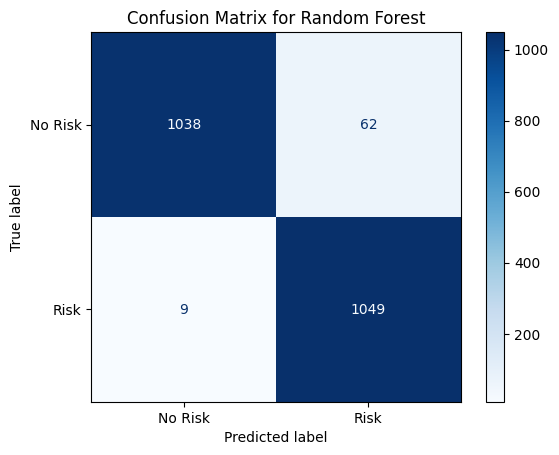

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Risk", "Risk"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Plot confusion matrices for each model
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

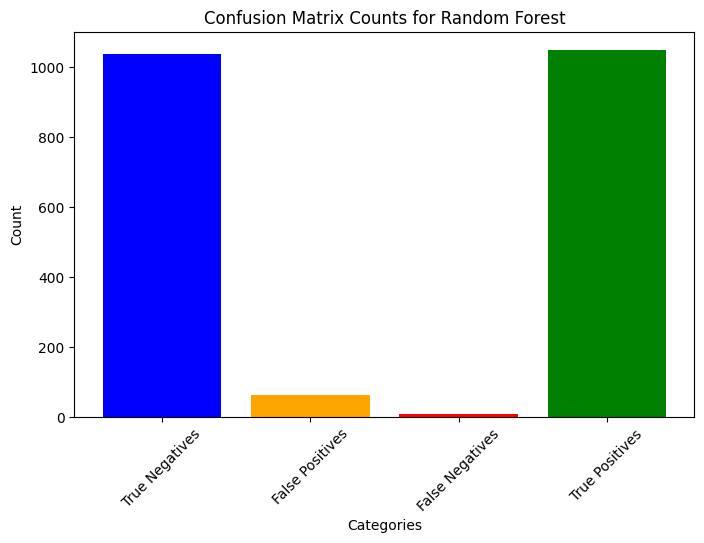

In [ ]:

def plot_confusion_matrix_bar(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    categories = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
    counts = [cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]]

    plt.figure(figsize=(8, 5))
    plt.bar(categories, counts, color=['blue', 'orange', 'red', 'green'])
    plt.title(f'Confusion Matrix Counts for {model_name}')
    plt.ylabel('Count')
    plt.xlabel('Categories')
    plt.xticks(rotation=45)
    plt.show()

plot_confusion_matrix_bar(y_test, y_pred_rf, "Random Forest")